<a href="https://colab.research.google.com/github/DzakiNurtauriqMirawan/Mini-Projek-DatMin/blob/main/Tugas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Car Rental Dataset**

#**Import Library**

In [364]:
#Sertakan kode dari import library yang kalian gunakan untuk tahap ini yaa, bebas mau apa aja gak harus dari praktek yang kita lakukan di lab
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## Library Splitting Data


In [365]:
from sklearn.model_selection import train_test_split

## Library Normalize Data

In [366]:
from sklearn.preprocessing import MinMaxScaler

## Library Build Model

In [367]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan utama dari proyek ini adalah untuk mendorong keputusan bisnis yang terinformasi dan cerdas dalam industri persewaan mobil, termasuk dinamika pasar seperti popularitas kendaraan, harga sewa tipikal, potensi kesenjangan dan kejenuhan pasar.
 Kami fokus pada analisis data yang dikumpulkan secara independen untuk memahami  di berbagai kota besar di Amerika.

##**Assess Situation**

Situasi yang dinilai mencakup proses pengumpulan data yang dilakukan pada bulan Juli 2020 yang mencakup penambangan web dari berbagai sumber online di kota-kota besar di AS (Amerika Serikat).  Metode ini menggunakan skrip scraping yang dikembangkan berdasarkan masukan dari komunitas StackOverflow dan memberikan pendekatan  kreatif dan teknis untuk mengatasi tantangan pengumpulan data  skala besar.

##**Data Mining Goals**

Tujuan utama dari penggalian data ini adalah untuk mengidentifikasi pola dan tren yang relevan dalam industri persewaan mobil, termasuk mengidentifikasi merek dan model mobil  paling populer di setiap kota, menganalisis harga sewa pada umumnya, dan menilai potensi kejenuhan dan kesenjangan pasar itu bisa dieksploitasi.
Selain itu, proyek ini juga akan menyelidiki hubungan antara peringkat yang diberikan oleh pengguna di situs persewaan mobil  dan persepsi keandalan serta konsistensi nilai peringkat yang tinggi.

##**Project Plan**

Rencana proyek  mencakup langkah-langkah sistematis mulai dari pengumpulan data menggunakan skrip scraping yang dikembangkan hingga pembersihan dan pemrosesan data untuk memastikan kualitas dan konsistensi data yang dihasilkan.
 Analisis data kemudian dilakukan dengan menggunakan berbagai metode statistik dan teknik penambangan data untuk mengidentifikasi pola dan tren yang dapat memberikan wawasan berharga bagi bisnis .
 Hasil analisis akan diinterpretasikan secara cermat untuk mengambil keputusan strategis berdasarkan data, dengan harapan melalui pembagian kumpulan data yang dihasilkan kepada publik, akan memberikan kontribusi positif bagi industri persewaan mobil dan bermanfaat bagi masyarakat umum.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset yang digunakan ini berasal dari Kaggle, sebuah platform yang terkenal di kalangan komunitas ilmiah dan analitis di seluruh dunia.

Link Dataset : https://www.kaggle.com/datasets/kushleshkumar/cornell-car-rental-dataset/code, yang berisi tentang dataset mobil rental yang saya ambil dari web kaggle

In [368]:
df_file = pd.read_csv('CarRentalData.csv') #masukin data kalian di sini
df_file

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,GASOLINE,5.00,32,27,Honolulu,US,21.292950,-157.836856,HI,9794111,33,Chevrolet,Cruze,car,2017
5847,HYBRID,5.00,17,16,Aiea,US,21.375507,-157.914919,HI,2754690,49,Lexus,HS 250h,car,2010
5848,GASOLINE,4.94,18,17,Kailua,US,21.378719,-157.727816,HI,11313508,35,smart,fortwo,car,2013
5849,GASOLINE,NaN,1,0,Waipahu,US,21.376105,-158.020237,HI,4209883,77,GMC,Savana,van,2015


##**Describe Data**

####Informasi Dasar

In [369]:
print("Baris: ", df_file.shape[0])
print("Kolom: ", df_file.shape[1])#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian

Baris:  5851
Kolom:  15


Query di atas adalah perintah dalam bahasa pemrograman Python yang digunakan untuk mencetak jumlah baris dan kolom dari dataframe yang saya simpan dalam variabel `df_file`.

1. `df_file.shape[0]` mengembalikan jumlah baris dari dataframe `df_file`.
2. `df_file.shape[1]` mengembalikan jumlah kolom dari dataframe `df_file`.

Hasil cetak dari perintah di atas akan menampilkan jumlah baris dan kolom dari dataframe `df_file`. Dengan demikian, `Baris: 5851` diikuti oleh jumlah baris dan `Kolom: 15` diikuti oleh jumlah kolom.

In [370]:
df_file.columns

Index(['fuelType', 'rating', 'renterTripsTaken', 'reviewCount',
       'location.city', 'location.country', 'location.latitude',
       'location.longitude', 'location.state', 'owner.id', 'rate.daily',
       'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year'],
      dtype='object')

df.columns = digunakan untuk mengakses nama-nama kolom dari DataFrame. Ini memberikan kumpulan nama-nama kolom dalam bentuk Index.

1. **fuelType**: Kolom ini berisi jenis bahan bakar yang digunakan oleh kendaraan atau objek yang terkait dalam dataset.
   
2. **rating**: Kolom ini berisi rating untuk suatu objek atau layanan dalam dataset. Rating ini bisa dalam bentuk numerik, biasanya dari skala tertentu.

3. **renterTripsTaken**: Kolom ini berisi jumlah perjalanan yang telah diambil oleh penyewa terkait dengan objek atau layanan dalam dataset.

4. **reviewCount**: Kolom ini berisi jumlah ulasan yang diberikan oleh pengguna atau pelanggan untuk suatu objek atau layanan dalam dataset.

5. **location.city**: Kolom ini berisi nama kota tempat objek atau layanan berada.

6. **location.country**: Kolom ini berisi nama negara tempat objek atau layanan berada.

7. **location.latitude**: Kolom ini berisi nilai koordinat lintang dari lokasi suatu objek atau layanan.

8. **location.longitude**: Kolom ini berisi nilai koordinat bujur dari lokasi suatu objek atau layanan.

9. **location.state**: Kolom ini berisi nama negara bagian atau provinsi tempat objek atau layanan berada.

10. **owner.id**: Kolom ini berisi ID dari pemilik suatu objek atau layanan.

11. **rate.daily**: Kolom ini berisi tarif harian untuk suatu objek atau layanan yang ditawarkan.

12. **vehicle.make**: Kolom ini berisi merek kendaraan yang terkait dalam dataset.

13. **vehicle.model**: Kolom ini berisi model kendaraan yang terkait dalam dataset.

14. **vehicle.type**: Kolom ini berisi jenis kendaraan, seperti "sedan", "SUV", "truk", dll.

15. **vehicle.year**: Kolom ini berisi tahun pembuatan kendaraan yang terkait dalam dataset.

In [371]:
df_file.dtypes

fuelType               object
rating                float64
renterTripsTaken        int64
reviewCount             int64
location.city          object
location.country       object
location.latitude     float64
location.longitude    float64
location.state         object
owner.id                int64
rate.daily              int64
vehicle.make           object
vehicle.model          object
vehicle.type           object
vehicle.year            int64
dtype: object

dtypes = digunakan untuk memeriksa tipe data dari setiap kolom dalam DataFrame. Hal ini penting karena tipe data yang berbeda bisa mempengaruhi bagaimana operasi dan manipulasi data dilakukan.

1. **fuelType** (object): Variabel ini berisi jenis bahan bakar yang digunakan oleh kendaraan. Tipe data `object` menunjukkan bahwa nilai-nilai dalam kolom ini adalah teks atau string.

2. **rating** (float64): Variabel ini berisi rating dari suatu objek atau entitas. Tipe data `float64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah angka desimal.

3. **renterTripsTaken** (int64): Variabel ini berisi jumlah perjalanan yang telah diambil oleh penyewa. Tipe data `int64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah bilangan bulat.

4. **reviewCount** (int64): Variabel ini berisi jumlah ulasan yang diberikan oleh pengguna atau pelanggan. Tipe data `int64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah bilangan bulat.

5. **location.city** (object): Variabel ini berisi nama kota tempat suatu objek atau entitas berada. Tipe data `object` menunjukkan bahwa nilai-nilai dalam kolom ini adalah teks atau string.

6. **location.country** (object): Variabel ini berisi nama negara tempat suatu objek atau entitas berada. Tipe data `object` menunjukkan bahwa nilai-nilai dalam kolom ini adalah teks atau string.

7. **location.latitude** (float64): Variabel ini berisi koordinat lintang dari lokasi suatu objek atau entitas. Tipe data `float64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah angka desimal.

8. **location.longitude** (float64): Variabel ini berisi koordinat bujur dari lokasi suatu objek atau entitas. Tipe data `float64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah angka desimal.

9. **location.state** (object): Variabel ini berisi nama negara bagian atau provinsi tempat suatu objek atau entitas berada. Tipe data `object` menunjukkan bahwa nilai-nilai dalam kolom ini adalah teks atau string.

10. **owner.id** (int64): Variabel ini berisi ID dari pemilik suatu objek atau entitas. Tipe data `int64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah bilangan bulat.

11. **rate.daily** (int64): Variabel ini berisi tarif harian untuk suatu objek atau layanan yang ditawarkan. Tipe data `int64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah bilangan bulat.

12. **vehicle.make** (object): Variabel ini berisi merek dari kendaraan yang terkait dengan data tersebut. Tipe data `object` menunjukkan bahwa nilai-nilai dalam kolom ini adalah teks atau string.

13. **vehicle.model** (object): Variabel ini berisi model kendaraan yang terkait dengan data tersebut. Tipe data `object` menunjukkan bahwa nilai-nilai dalam kolom ini adalah teks atau string.

14. **vehicle.type** (object): Variabel ini berisi jenis kendaraan, seperti "sedan", "SUV", "truk", dll. Tipe data `object` menunjukkan bahwa nilai-nilai dalam kolom ini adalah teks atau string.

15. **vehicle.year** (int64): Variabel ini berisi tahun pembuatan kendaraan. Tipe data `int64` menunjukkan bahwa nilai-nilai dalam kolom ini adalah bilangan bulat.

####Informasi Lanjutan

In [372]:
df_file.info()#Ketikan kode di sini, untuk menampilkan informasi lengkap dari dataset kalian

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

1. `fuelType`: Jenis bahan bakar yang digunakan oleh kendaraan. Terdapat 5776 entri non-null dalam bentuk objek (string).
2. `rating`: Rating atau penilaian kendaraan. Terdapat 5350 entri non-null dalam bentuk float64.
3. `renterTripsTaken`: Jumlah perjalanan yang diambil oleh penyewa. Terdapat 5851 entri dalam bentuk integer.
4. `reviewCount`: Jumlah ulasan yang diberikan. Terdapat 5851 entri dalam bentuk integer.
5. `location.city`: Nama kota lokasi kendaraan. Terdapat 5851 entri non-null dalam bentuk objek (string).
6. `location.country`: Nama negara lokasi kendaraan. Terdapat 5851 entri non-null dalam bentuk objek (string).
7. `location.latitude`: Koordinat lintang lokasi kendaraan. Terdapat 5851 entri non-null dalam bentuk float64.
8. `location.longitude`: Koordinat bujur lokasi kendaraan. Terdapat 5851 entri non-null dalam bentuk float64.
9. `location.state`: Nama negara bagian atau provinsi lokasi kendaraan. Terdapat 5851 entri non-null dalam bentuk objek (string).
10. `owner.id`: ID pemilik kendaraan. Terdapat 5851 entri non-null dalam bentuk integer.
11. `rate.daily`: Tarif sewa harian kendaraan. Terdapat 5851 entri non-null dalam bentuk integer.
12. `vehicle.make`: Merek kendaraan. Terdapat 5851 entri non-null dalam bentuk objek (string).
13. `vehicle.model`: Model kendaraan. Terdapat 5851 entri non-null dalam bentuk objek (string).
14. `vehicle.type`: Jenis kendaraan (misalnya, sedan, SUV, dll.). Terdapat 5851 entri non-null dalam bentuk objek (string).
15. `vehicle.year`: Tahun produksi kendaraan. Terdapat 5851 entri non-null dalam bentuk integer.


####Informasi Statistik Deskriptif

In [373]:
df_file.describe()#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000



1. **Rating (`rating`)**:
   - Rata-rata rating kendaraan adalah sekitar 4.92 dengan standar deviasi sekitar 0.18, menunjukkan bahwa mayoritas kendaraan memiliki rating yang sangat tinggi (mendekati 5).
   - Rentang rating berkisar dari 1 hingga 5.

2. **Jumlah perjalanan yang diambil oleh penyewa (`renterTripsTaken`)**:
   - Rata-rata jumlah perjalanan yang diambil oleh penyewa adalah sekitar 33.48, dengan variasi yang signifikan (standar deviasi sekitar 41.90), menunjukkan keragaman dalam penggunaan kendaraan.
   - Jumlah perjalanan yang diambil berkisar dari 0 hingga 395, dengan mayoritas renterTripsTaken berada di bawah 50.

3. **Jumlah ulasan yang diberikan (`reviewCount`)**:
   - Rata-rata jumlah ulasan yang diberikan adalah sekitar 28.45, dengan variasi yang cukup besar (standar deviasi sekitar 35.14).
   - Rentang jumlah ulasan berkisar dari 0 hingga 321.

4. **Koordinat lintang dan bujur lokasi kendaraan (`location.latitude` dan `location.longitude`)**:
   - Rata-rata koordinat lintang adalah sekitar 35.58, dan rata-rata koordinat bujur adalah sekitar -99.63.
   - Variasi koordinat menunjukkan variasi lokasi kendaraan yang luas.

5. **ID pemilik kendaraan (`owner.id`)**:
   - Rata-rata ID pemilik kendaraan adalah sekitar 6.03 juta.
   - ID pemilik berkisar dari 5105 hingga 15.810.880.

6. **Tarif sewa harian kendaraan (`rate.daily`)**:
   - Rata-rata tarif sewa harian kendaraan adalah sekitar 93.69 dollar dengan variasi yang signifikan standar deviasi sekitar 96.08 dollar
   - Tarif harian berkisar dari 20 dollar hingga 1500 dollar.

7. **Tahun produksi kendaraan (`vehicle.year`)**:
   - Rata-rata tahun produksi kendaraan adalah sekitar 2015.34 dengan standar deviasi sekitar 4.05.
   - Tahun produksi kendaraan berkisar dari 1955 hingga 2020.


In [374]:
df_file.corr(numeric_only = True)

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
rating,1.000000,-0.054883,-0.040144,-0.002643,-0.015799,0.051674,0.086745,0.108765
renterTripsTaken,-0.054883,1.000000,0.994177,0.010998,-0.053036,-0.331197,-0.104027,-0.123407
reviewCount,-0.040144,0.994177,1.000000,0.007881,-0.047017,-0.325160,-0.100856,-0.111388
location.latitude,-0.002643,0.010998,0.007881,1.000000,-0.012547,0.006748,-0.013018,-0.030036
location.longitude,-0.015799,-0.053036,-0.047017,-0.012547,1.000000,0.020020,0.057446,0.018361
owner.id,0.051674,-0.331197,-0.325160,0.006748,0.020020,1.000000,-0.011215,0.095297
rate.daily,0.086745,-0.104027,-0.100856,-0.013018,0.057446,-0.011215,1.000000,0.042639
vehicle.year,0.108765,-0.123407,-0.111388,-0.030036,0.018361,0.095297,0.042639,1.000000


In [375]:
px.imshow(df_file.corr(numeric_only = True))

##**Exploratory Data Analysis**

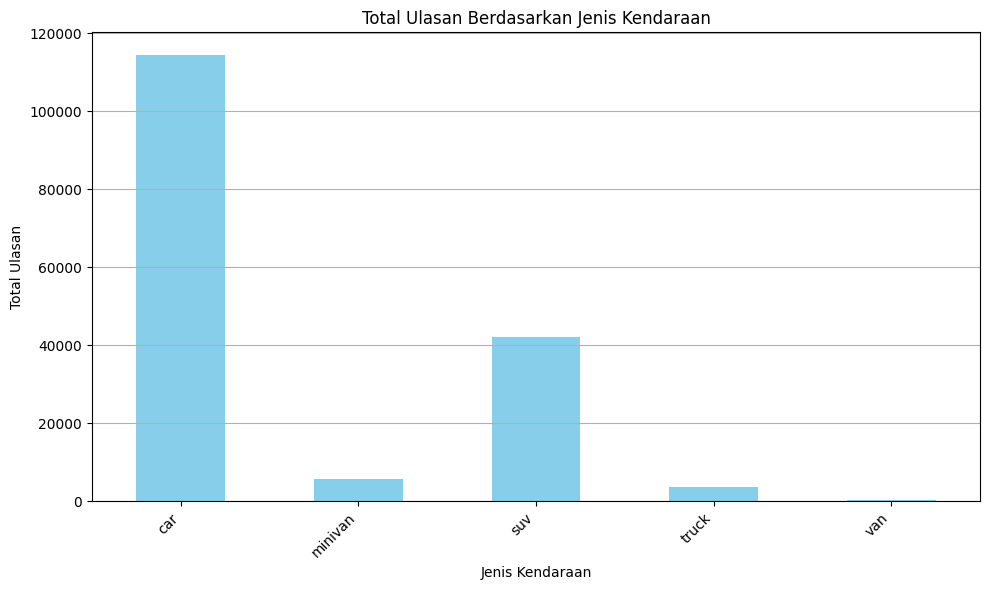

In [376]:
# Menyiapkan data
data = df_file.groupby('vehicle.type')['reviewCount'].sum()

# Membuat bar chart
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='skyblue')
plt.title('Total Ulasan Berdasarkan Jenis Kendaraan')
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Total Ulasan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Menampilkan bar chart
plt.tight_layout()
plt.show()

**Bar Chart: Total Ulasan Berdasarkan Jenis Kendaraan**

   Penjelasan: Bar chart tersebut menunjukkan total ulasan yang diberikan untuk setiap jenis kendaraan. Dari visualisasi ini, terlihat bahwa jenis kendaraan SUV memiliki jumlah ulasan tertinggi, diikuti oleh sedan dan truck. Sedangkan jenis kendaraan lainnya memiliki jumlah ulasan yang lebih rendah. Asumsi yang mungkin terkait adalah bahwa kendaraan dengan jenis yang lebih umum atau populer cenderung mendapatkan lebih banyak ulasan daripada yang lainnya.

<ipython-input-377-d16ffe92b83c>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



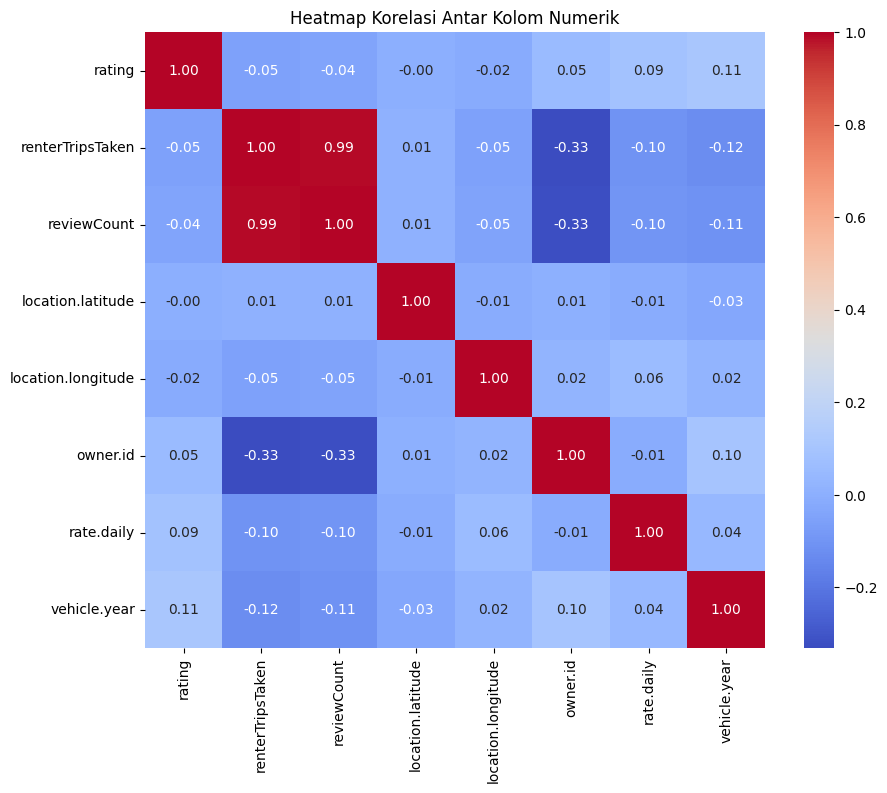

In [377]:
# Membaca dataset
df_file = pd.read_csv('CarRentalData.csv')

# Menghitung korelasi antar kolom numerik
corr = df_file.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()


Visualisasi heatmap korelasi digunakan untuk menampilkan tingkat korelasi antar kolom numerik dalam dataset. Dari heatmap tersebut, kita dapat melihat apakah terdapat hubungan positif atau negatif antara dua kolom numerik. Sebagai contoh, jika terdapat korelasi positif yang tinggi antara dua kolom, maka ketika nilai kolom satu meningkat, nilai kolom lainnya cenderung meningkat juga. Sebaliknya, jika terdapat korelasi negatif yang tinggi, ketika nilai kolom satu meningkat, nilai kolom lainnya cenderung menurun. Oleh karena itu, heatmap korelasi membantu dalam menemukan pola atau hubungan antara variabel dalam dataset.

##**Verify Data Quality**

####Missing Values

In [378]:
# Membaca dataset
df_file = pd.read_csv('CarRentalData.csv')

# Memeriksa adanya nilai yang hilang
missing_values = df_file.isnull().sum()

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
print("Jumlah nilai yang hilang untuk setiap kolom:")
print(missing_values)

# Menampilkan persentase nilai yang hilang untuk setiap kolom
total_cells = df_file.shape[0] * df_file.shape[1]
total_missing = missing_values.sum()
percentage_missing = (total_missing / total_cells) * 100
print("\nPersentase nilai yang hilang dalam dataset: {:.2f}%".format(percentage_missing))#Tambahkan kode untuk mengecek apakah ada nilai kosong pada tiap kolom di dataset kalian ya

Jumlah nilai yang hilang untuk setiap kolom:
fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64

Persentase nilai yang hilang dalam dataset: 0.66%


1. **Jumlah nilai yang hilang untuk setiap kolom**:
   - Hasil ini menunjukkan jumlah nilai yang kosong (missing values) dalam setiap kolom dataset. Jika ada nilai yang kosong, angka ini akan menunjukkan berapa banyak nilai yang perlu diisi atau diperiksa lebih lanjut.
   - Jika jumlah nilai yang hilang untuk sebuah kolom adalah nol, itu berarti tidak ada nilai yang kosong dalam kolom tersebut. Ini adalah indikasi yang baik bahwa data dalam kolom tersebut lengkap.

2. **Persentase nilai yang hilang dalam dataset**:
   - Persentase ini memberikan gambaran tentang seberapa besar proporsi dari seluruh dataset yang terdiri dari nilai kosong.
   - Jika persentase ini mendekati nol, itu menandakan bahwa dataset memiliki sedikit nilai yang hilang dan kualitas data secara keseluruhan baik.
   - Namun, jika persentase ini tinggi (misalnya, lebih dari 5% atau 10%), itu menunjukkan bahwa sejumlah besar data mungkin hilang, yang dapat mempengaruhi analisis dan kesimpulan yang diambil dari dataset tersebut.

####Outliers Values

In [379]:
import pandas as pd

# Load data
df = pd.read_csv('CarRentalData.csv')

# Fungsi untuk mendeteksi outliers menggunakan metode IQR (Interquartile Range)
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Deteksi outliers untuk setiap kolom numerik
outliers_df = df.select_dtypes(include=['int64', 'float64']).apply(detect_outliers)

# Hitung persentase outliers
outliers_percentage = (outliers_df.sum() / len(df)) * 100

# Tampilkan hasil
print("Persentase Outliers dalam Dataset:")
print(outliers_percentage)


Persentase Outliers dalam Dataset:
rating                8.203726
renterTripsTaken      6.221159
reviewCount           6.169885
location.latitude     0.769099
location.longitude    0.000000
owner.id              0.000000
rate.daily            5.708426
vehicle.year          2.392753
dtype: float64


1. **Rating**: Dalam konteks dataset ini, rating mengacu pada peringkat atau penilaian yang diberikan kepada suatu objek atau layanan. Persentase outliers sebesar 8.20% menunjukkan bahwa sebagian kecil nilai rating berada jauh dari nilai-nilai lainnya, yang dapat mengindikasikan adanya ulasan yang sangat tinggi atau sangat rendah yang mungkin perlu ditinjau lebih lanjut.

2. **RenterTripsTaken**: Ini mengacu pada jumlah perjalanan yang diambil oleh penyewa. Persentase outliers sebesar 6.22% menunjukkan bahwa ada beberapa penyewa yang melakukan jumlah perjalanan yang jauh lebih tinggi atau lebih rendah dari mayoritas, yang bisa menjadi perhatian untuk analisis lebih lanjut.

3. **ReviewCount**: merujuk pada jumlah ulasan yang diberikan untuk suatu objek atau layanan. Persentase outliers sebesar 6.17% menunjukkan bahwa ada beberapa objek atau layanan yang menerima jumlah ulasan yang sangat tinggi atau sangat rendah dibandingkan dengan yang lain.

4. **Location.latitude dan Location.longitude**: Ini koordinat geografis lokasi objek atau layanan. Persentase outliers yang rendah (0.77% untuk latitude dan 0% untuk longitude) menunjukkan bahwa sebagian besar data koordinat berada dalam kisaran yang wajar, dengan sebagian kecil nilai yang mungkin berada jauh dari mayoritas.

5. **Owner.id**: Ini mengacu pada identifikasi unik pemilik objek atau layanan. Persentase outliers yang rendah (0%) menunjukkan bahwa mayoritas data memiliki identifikasi yang seragam, tanpa nilai yang jauh berbeda.

6. **Rate.daily**: Ini  adalah tarif harian untuk objek atau layanan tersebut. Persentase outliers sebesar 5.71% menunjukkan bahwa ada beberapa tarif harian yang jauh lebih tinggi atau lebih rendah dari mayoritas, yang mungkin perlu ditinjau lebih lanjut.

7. **Vehicle.year**: Ini  mengacu pada tahun pembuatan kendaraan. Persentase outliers sebesar 2.39% menunjukkan bahwa ada beberapa kendaraan dengan tahun pembuatan yang jauh lebih tua atau lebih baru dari mayoritas, yang bisa menjadi perhatian untuk analisis lebih lanjut.

####Duplicated Values

In [380]:
# Load data
df = pd.read_csv('CarRentalData.csv')

# Periksa keberadaan nilai-nilai yang diduplikasi
duplicate_rows = df[df.duplicated()]

# Tampilkan hasil
print("Jumlah nilai yang diduplikasi dalam dataset:", len(duplicate_rows))


Jumlah nilai yang diduplikasi dalam dataset: 0


Hasil query ' Jumlah nilai yang diduplikasi dalam dataset: 0 ' menyatakan bahwa dalam dataset tidak ada nilai yang diduplikasi. Ini berarti setiap baris dalam dataset memiliki nilai yang unik, tidak ada duplikasi data. Penemuan ini menunjukkan bahwa tidak ada observasi yang identik dalam dataset, yang bisa menjadi indikasi bahwa data telah diolah dengan benar atau sudah diambil langkah-langkah untuk menghilangkan duplikasi sebelumnya.

Jika terdapat nilai yang diduplikasi dalam dataset, hal itu dapat menyebabkan masalah dalam analisis data karena observasi yang identik bisa menyebabkan kesalahan dalam model atau analisis statistik. Dengan tidak adanya nilai yang diduplikasi, dapat disimpulkan dataset tersebut telah melalui proses pembersihan data yang baik atau dihasilkan dari sumber data yang terorganisir dengan baik yang memastikan keunikannya.

#### Inconsistent Values / Noise (Optional)

tidak ada data noice (opsional)

# **Data Cleaning**

## Missing Values

pengecekan values CarRentalDataset. bisa kita lihat terdapat 2 kolom yang nilai kosong yaitu fuelType dan rating

In [381]:
print((df.isna().sum() / len(df)) * 100)

fuelType              1.281832
rating                8.562639
renterTripsTaken      0.000000
reviewCount           0.000000
location.city         0.000000
location.country      0.000000
location.latitude     0.000000
location.longitude    0.000000
location.state        0.000000
owner.id              0.000000
rate.daily            0.000000
vehicle.make          0.000000
vehicle.model         0.000000
vehicle.type          0.000000
vehicle.year          0.000000
dtype: float64


Pengecekan nilai kosong pada kolom fuelType

In [382]:
df[df['fuelType'].isnull()]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
32,NaN,5.00,9,8,Augusta,US,33.368491,-81.966430,GA,11515981,47,Ford,Fiesta,car,2019
151,NaN,NaN,0,0,Atlanta,US,33.595022,-84.422693,GA,14917535,28,Kia,Rio,car,2020
213,NaN,NaN,0,0,Stone Mountain,US,33.769810,-84.193510,GA,5162679,67,Toyota,Camry,car,2020
223,NaN,5.00,10,8,Atlanta,US,33.753282,-84.466572,GA,1886829,299,Land Rover,Range Rover,suv,2020
224,NaN,4.80,5,5,Duluth,US,34.033443,-84.181063,GA,886557,216,Audi,A8,car,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,NaN,4.97,48,38,Orem,US,40.287331,-111.689198,UT,1126176,45,Honda,Accord,car,2016
5242,NaN,4.69,14,13,Costa Mesa,US,33.651681,-117.914952,CA,9851566,85,Tesla,Model 3,car,2018
5415,NaN,5.00,27,26,Tampa,US,28.057198,-82.550716,FL,3221724,116,Tesla,Model 3,car,2020
5475,NaN,5.00,33,25,Tampa,US,27.968623,-82.563178,FL,7122299,299,Ford,Mustang,car,1965


Pengecekan nilai kosong pada kolom rating

In [383]:
df[df['rating'].isnull()]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
16,GASOLINE,NaN,0,0,Albuquerque,US,35.115653,-106.578805,NM,1889102,42,Jeep,Cherokee,suv,2018
29,GASOLINE,NaN,0,0,Grovetown,US,33.508520,-82.236315,GA,14680097,125,GMC,Yukon XL,suv,2018
44,GASOLINE,NaN,0,0,Tampa,US,28.082946,-82.542147,FL,14752326,96,BMW,4 Series,car,2018
87,GASOLINE,NaN,0,0,Atlanta,US,33.640920,-84.444136,GA,10696094,70,Mercedes-Benz,GLA-Class,suv,2015
106,ELECTRIC,NaN,0,0,Atlanta,US,33.789835,-84.388128,GA,1523445,138,Tesla,Model 3,car,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5820,GASOLINE,NaN,2,0,Honolulu,US,21.336023,-157.912982,HI,12868620,50,Lexus,ES 350,car,2009
5827,GASOLINE,NaN,0,0,Honolulu,US,21.308294,-157.861220,HI,8009381,59,Lexus,RX 350,suv,2014
5837,GASOLINE,NaN,0,0,Ewa Beach,US,21.314769,-158.030386,HI,14621149,35,Jeep,Cherokee,suv,2015
5841,GASOLINE,NaN,0,0,Schofield Barracks,US,21.496249,-158.061372,HI,6541927,165,Land Rover,Range Rover Velar,suv,2018


###### imputasi values

Untuk kolom fueltype dan rating, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom fuelType dan rating

In [384]:
df['rating'].dropna().describe()

count    5350.000000
mean        4.920325
std         0.182425
min         1.000000
25%         4.900000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom rating untuk imputasi nilai kosong tersebut

In [385]:
df['rating'] = df['rating'].fillna(df['rating'].dropna().mean())

In [386]:
df['fuelType'].dropna().describe()

count         5776
unique           4
top       GASOLINE
freq          4810
Name: fuelType, dtype: object

Untuk kolom fuelType akan kita lakukan imputasi, yaitu dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [387]:
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].mode()[0])

###### **pengecekan ulang**

In [388]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
fuelType,0.0
rating,0.0
renterTripsTaken,0.0
reviewCount,0.0
location.city,0.0
location.country,0.0
location.latitude,0.0
location.longitude,0.0
location.state,0.0
owner.id,0.0



Hasil query di atas memberikan rasio nol atau persentase nol untuk setiap kolom dalam DataFrame. Rasio nol ini menunjukkan persentase jumlah nilai null atau kosong untuk setiap kolom. Dalam konteks ini, persentase nol menunjukkan bahwa tidak ada nilai null dalam setiap kolom yang disebutkan

## Duplicate Values

Pada values CarRentalDataset bisa kita lihat pada hasil querry tidak terdapat kolom yang ter duplicate, maka dari itu tidak perlu ada yang harus kita drop

In [389]:
df[df.duplicated()]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year


## Finding Outliers values

#### Pengecekan Outliers

In [390]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
rating,9.109554
renterTripsTaken,6.221159
reviewCount,6.169885
location.latitude,0.769099
location.longitude,0.000000
owner.id,0.000000
rate.daily,5.708426
vehicle.year,2.392753


Hasil query di atas memberikan persentase outliers untuk beberapa kolom dalam DataFrame. Outliers atau pencilan adalah nilai-nilai yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Dalam konteks ini, persentase outliers menunjukkan seberapa banyak data dalam setiap kolom di luar jangkauan nilai-nilai yang dianggap sebagai "pencilan".

Berikut penjelasan untuk setiap kolom:

- **renterTripsTaken**: Persentase outliers adalah 6.22%. Ini berarti sekitar 6.22% dari nilai dalam kolom 'renterTripsTaken' dianggap sebagai pencilan, atau nilai-nilai yang signifikan berbeda dari mayoritas jumlah perjalanan yang diambil oleh penyewa.
  
- **reviewCount**: Persentase outliers adalah 6.17%. Ini menunjukkan sekitar 6.17% dari nilai dalam kolom 'reviewCount' dianggap sebagai pencilan, atau nilai-nilai yang signifikan berbeda dari mayoritas jumlah ulasan.
  
- **location.latitude**: Persentase outliers adalah 0.77%. Ini menunjukkan sekitar 0.77% dari nilai dalam kolom 'location.latitude' dianggap sebagai pencilan, atau nilai-nilai yang signifikan berbeda dari mayoritas koordinat lintang lokasi.
  
- **location.longitude**: Persentase outliers adalah 0.00%. Ini menunjukkan bahwa tidak ada nilai pencilan dalam kolom 'location.longitude', atau semua nilai berada dalam jangkauan yang normal dari koordinat bujur lokasi.
  
- **owner.id**: Persentase outliers adalah 0.00%. Ini menunjukkan bahwa tidak ada nilai pencilan dalam kolom 'owner.id', atau semua nilai merupakan ID pemilik yang tidak signifikan berbeda dari mayoritas.
  
- **rate.daily**: Persentase outliers adalah 5.71%. Ini menunjukkan sekitar 5.71% dari nilai dalam kolom 'rate.daily' dianggap sebagai pencilan, atau nilai-nilai yang signifikan berbeda dari mayoritas tarif harian.
  
- **vehicle.year**: Persentase outliers adalah 2.39%. Ini berarti sekitar 2.39% dari nilai dalam kolom 'vehicle.year' dianggap sebagai pencilan, atau nilai-nilai yang signifikan berbeda dari mayoritas tahun kendaraan.

Text(0.5, 1.0, 'Boxplot for Owner ID')

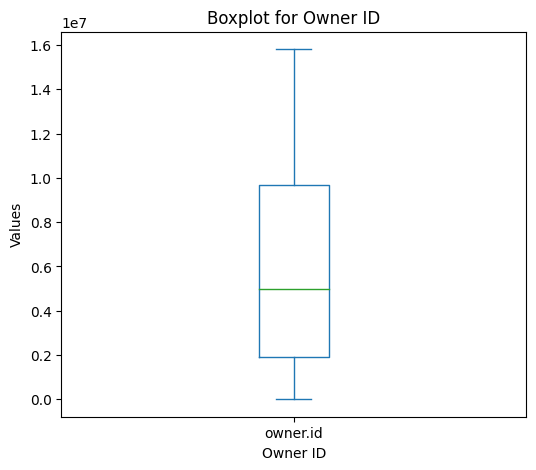

In [391]:
boxplot = df['owner.id'].plot(kind='box', grid=False, figsize=(6,5))
boxplot.set_xlabel('Owner ID')
boxplot.set_ylabel('Values')
boxplot.set_title('Boxplot for Owner ID')


Diatas adalah hasil boxplot dari kolom owner.id

Text(0.5, 1.0, 'Boxplot for vehicle.year')

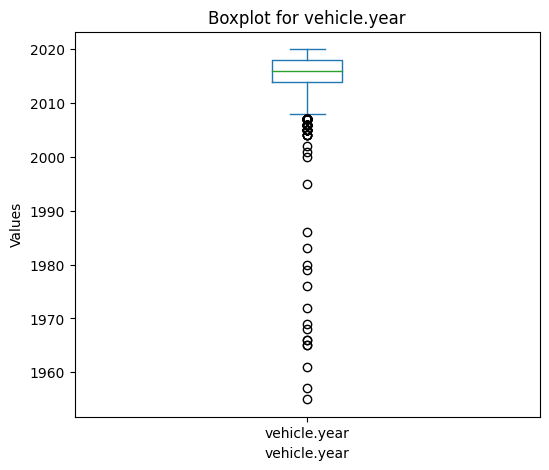

In [392]:
boxplot = df['vehicle.year'].plot(kind='box', grid=False, figsize=(6,5))
boxplot.set_xlabel('vehicle.year')
boxplot.set_ylabel('Values')
boxplot.set_title('Boxplot for vehicle.year')


diatas adalah hasil boxplot vehicle.year

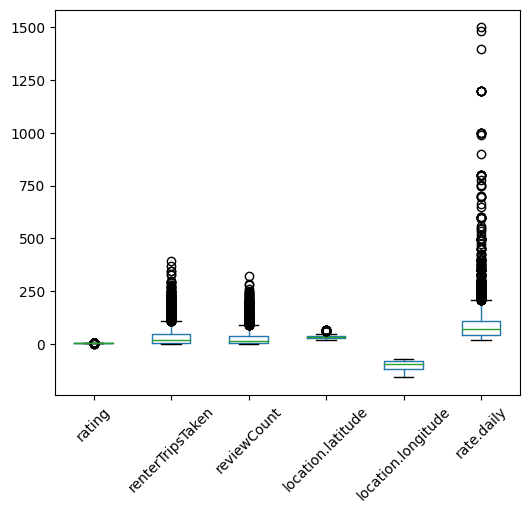

In [393]:
columns_to_drop = ['owner.id', 'vehicle.year']
boxplot = df.drop(columns_to_drop, axis=1).boxplot(grid=False, rot=45, figsize=(6,5))

diatas adalah hasil boxplot dari kumpulan kolom dataset, kenapa dipisah dengan kolom owner.id dan vehicle.year agar boxplot bisa terbaca dengan jelas.

### Hapus outliers

melakukan penghapusan pada kolom renterTripsTaken dan reviewCount untuk menangani outliers

In [394]:
Q1 = df['renterTripsTaken'].quantile(0.25)
Q3 = df['renterTripsTaken'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['renterTripsTaken'] >= lower_bound) & (df['renterTripsTaken'] <= upper_bound)]

In [395]:
Q1 = df['reviewCount'].quantile(0.25)
Q3 = df['reviewCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['reviewCount'] >= lower_bound) & (df['reviewCount'] <= upper_bound)]

### Imputasi Outliers

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom rate.daily

In [396]:
Q1 = df['rate.daily'].quantile(0.25)
Q3 = df['rate.daily'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['rate.daily']=np.where(df['rate.daily']>upper_whisker,upper_whisker,np.where(df['rate.daily']<lower_whisker,lower_whisker,df['rate.daily']))

### pengecekan ulang

In [397]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Exclude rows corresponding to 'location.latitude' and 'location.longitude' from the results DataFrame
filtered_results_df = results_df.drop(index=['location.latitude', 'location.longitude', 'owner.id', 'vehicle.year'])

# Display the filtered results DataFrame
display(filtered_results_df)


Kolom,Persentase Outliers
rating,9.992529
renterTripsTaken,1.905118
reviewCount,1.363467
rate.daily,0.000000


pada hasil pengecekan ulang kolom 'location.latitude', 'location.longitude', 'owner.id' dan 'vehicle.year' dikecualikan karena bakal merusak koordinatnya

## Constrcut Data

### melakukan rekayasa fitur

yaitu dengan menambahkan kolom baru yang bertujuan untuk mempermudah struktur agar sesuai dengan kebutuhan yang digunakan. Seperti menambahkan kolom baru yaitu YearCategory untuk mengetahui mobil old, mid, dan new sesuai dengan tahun mobil tersebut.

In [398]:
def categorize_vehicle_year(year):
    if year < 2010:
        return 'Old'
    elif 2010 <= year < 2015:
        return 'Mid'
    else:
        return 'New'

df['YearCategory'] = df['vehicle.year'].apply(categorize_vehicle_year)


In [399]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,YearCategory
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135.0,Tesla,Model X,suv,2019,New
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190.0,Tesla,Model X,suv,2018,New
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35.0,Toyota,Prius,car,2012,Mid
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75.0,Ford,Mustang,car,2018,New
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47.0,Chrysler,Sebring,car,2010,Mid


# hasil data cleaning

In [400]:
df_cleaned = df.dropna()

print('\nData setelah cleaning:')
print(df_cleaned.head())


Data setelah cleaning:
   fuelType  rating  renterTripsTaken  reviewCount location.city  \
0  ELECTRIC    5.00                13           12       Seattle   
1  ELECTRIC    5.00                 2            1       Tijeras   
2    HYBRID    4.92                28           24   Albuquerque   
3  GASOLINE    5.00                21           20   Albuquerque   
4  GASOLINE    5.00                 3            1   Albuquerque   

  location.country  location.latitude  location.longitude location.state  \
0               US          47.449107         -122.308841             WA   
1               US          35.111060         -106.276551             NM   
2               US          35.127163         -106.566681             NM   
3               US          35.149726         -106.711425             NM   
4               US          35.208659         -106.601008             NM   

   owner.id  rate.daily vehicle.make vehicle.model vehicle.type  vehicle.year  \
0  12847615       135.0      

### membuat file csv

In [401]:
df_cleaned.to_csv('Data Cleaning.csv', index= False)

# **Data Reductions**

pada data redutions tidak ada yang saya drop dikarenakan pada Data Mining Goals saya membutuhkan kolom-kolom yang lain dalam artian saling membutuhkan.

In [402]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [403]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,YearCategory
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135.0,Tesla,Model X,suv,2019,New
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190.0,Tesla,Model X,suv,2018,New
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35.0,Toyota,Prius,car,2012,Mid
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75.0,Ford,Mustang,car,2018,New
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47.0,Chrysler,Sebring,car,2010,Mid


# **Data Transformations**

### **Mapping**

In [404]:
df['YearCategory'] = df['YearCategory'].map({'Old': 0, 'Mid': 1,'New': 2}).astype(int)

Querry di atas berfungsi untuk membuat kolom baru yang disebut 'YearCategory' dalam DataFrame 'df'. Kolom baru ini akan berisi nilai kategoris yang mewakili kategori tahun kendaraan berdasarkan kriteria tertentu, yaitu "Old" (Tua), "Mid" (Tengah), dan "New" (Baru). Setelah nilai kategoris ditentukan, mereka akan dipetakan ke angka-angka tertentu, yaitu 0 untuk "Old", 1 untuk "Mid", dan 2 untuk "New".

Berikut adalah penjelasannya:

1. `df['YearCategory'] =`: Ini adalah langkah pertama dalam querry yang menunjukkan bahwa kita membuat kolom baru yang disebut 'YearCategory' dalam DataFrame 'df' dan mengisinya dengan nilai kategoris.

2. `df['YearCategory'].map({'Old': 0, 'Mid': 1,'New': 2})`: Di sini, kita menggunakan metode `map()` untuk memetakan nilai-nilai dalam kolom 'YearCategory' ke nilai-nilai baru sesuai dengan peta yang diberikan. Peta ini adalah sebuah dictionary yang menetapkan setiap kategori ('Old', 'Mid', 'New') ke nilai angka yang sesuai (0, 1, 2).

3. `.astype(int)`: Terakhir, kita mengonversi tipe data kolom 'YearCategory' menjadi tipe data integer dengan menggunakan metode `astype(int)`. Ini diperlukan karena setelah pemetaan, nilai-nilai tersebut mungkin menjadi float, dan kita ingin mengubahnya menjadi integer.

### **Encoding**

In [405]:
df = pd.get_dummies(df)

Fungsi `pd.get_dummies(df)` adalah salah satu cara untuk melakukan one-hot encoding pada DataFrame 'df'. One-hot encoding adalah teknik yang digunakan untuk mengubah variabel kategorikal menjadi bentuk yang dapat diproses lebih mudah oleh algoritma pembelajaran mesin.

Berikut adalah penjelasan tentang cara kerja dari fungsi tersebut:

1. **Variabel Kategorikal**: Fungsi `pd.get_dummies(df)` akan mengidentifikasi kolom-kolom dalam DataFrame 'df' yang berisi variabel kategorikal. Variabel kategorikal adalah variabel yang memiliki nilai diskrit, seperti jenis kendaraan, jenis bahan bakar, kota, negara, dll.

2. **One-Hot Encoding**: Setelah mengidentifikasi kolom-kolom yang berisi variabel kategorikal, fungsi tersebut akan membuat kolom baru untuk setiap nilai unik dalam variabel tersebut. Kolom-kolom baru ini akan berisi nilai biner (0 atau 1), yang menunjukkan keberadaan atau ketiadaan nilai tersebut dalam baris data asli.

3. **Kolom Baru**: Misalnya, jika kolom 'jenis kendaraan' dalam DataFrame memiliki nilai 'sedan', 'SUV', dan 'truk', maka fungsi ini akan membuat tiga kolom baru, yaitu 'jenis kendaraan_sedan', 'jenis kendaraan_SUV', dan 'jenis kendaraan_truk'. Jika suatu baris dalam data memiliki nilai 'sedan' pada kolom 'jenis kendaraan', maka nilai '1' akan dimasukkan ke dalam kolom 'jenis kendaraan_sedan', sedangkan kolom-kolom lainnya akan memiliki nilai '0'.

4. **DataFrame Baru**: Akhirnya, fungsi ini akan mengembalikan DataFrame baru dengan kolom-kolom baru yang mewakili nilai-nilai variabel kategorikal dalam bentuk one-hot encoding.

### **Hasil**

In [406]:
df.head()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year,YearCategory,fuelType_DIESEL,...,vehicle.model_iM,vehicle.model_mustang,vehicle.model_tC,vehicle.model_xB,vehicle.model_xD,vehicle.type_car,vehicle.type_minivan,vehicle.type_suv,vehicle.type_truck,vehicle.type_van
0,5.00,13,12,47.449107,-122.308841,12847615,135.0,2019,2,0,...,0,0,0,0,0,0,0,1,0,0
1,5.00,2,1,35.111060,-106.276551,15621242,190.0,2018,2,0,...,0,0,0,0,0,0,0,1,0,0
2,4.92,28,24,35.127163,-106.566681,10199256,35.0,2012,1,0,...,0,0,0,0,0,1,0,0,0,0
3,5.00,21,20,35.149726,-106.711425,9365496,75.0,2018,2,0,...,0,0,0,0,0,1,0,0,0,0
4,5.00,3,1,35.208659,-106.601008,3553565,47.0,2010,1,0,...,0,0,0,0,0,1,0,0,0,0


# **Select Modeling Techniques**

## Modelling Predict

Saya memilih Modelling Predict karena tujuannya adalah untuk mengidentifikasi pola dan tren yang relevan dalam industri persewaan mobil, termasuk mengidentifikasi merek dan model mobil paling populer di setiap kota, menganalisis harga sewa secara umum, dan menilai potensi kejenuhan serta kesenjangan pasar yang dapat dieksploitasi. Selain itu, proyek ini juga akan menyelidiki hubungan antara peringkat yang diberikan oleh pengguna di situs persewaan mobil dan persepsi keandalan serta konsistensi nilai peringkat yang tinggi.

In [407]:
df.head()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year,YearCategory,fuelType_DIESEL,...,vehicle.model_iM,vehicle.model_mustang,vehicle.model_tC,vehicle.model_xB,vehicle.model_xD,vehicle.type_car,vehicle.type_minivan,vehicle.type_suv,vehicle.type_truck,vehicle.type_van
0,5.00,13,12,47.449107,-122.308841,12847615,135.0,2019,2,0,...,0,0,0,0,0,0,0,1,0,0
1,5.00,2,1,35.111060,-106.276551,15621242,190.0,2018,2,0,...,0,0,0,0,0,0,0,1,0,0
2,4.92,28,24,35.127163,-106.566681,10199256,35.0,2012,1,0,...,0,0,0,0,0,1,0,0,0,0
3,5.00,21,20,35.149726,-106.711425,9365496,75.0,2018,2,0,...,0,0,0,0,0,1,0,0,0,0
4,5.00,3,1,35.208659,-106.601008,3553565,47.0,2010,1,0,...,0,0,0,0,0,1,0,0,0,0


## **Pre-Processing**

### split data

Split data (pemisah data) adalah langkah penting dalam pembelajaran mesin di mana dataset dibagi menjadi dua bagian: subset pelatihan dan subset pengujian. Alasan kenapa harus melakukan Split data karena:
1. **Evaluasi Objektif**: Menggunakan data pelatihan untuk melatih model dan data pengujian untuk menguji kinerja model memastikan evaluasi yang adil dan objektif.

2. **Mendeteksi Overfitting**: Memungkinkan kita untuk melihat apakah model terlalu cocok dengan data pelatihan (overfitting) atau tidak.

3. **Menghindari Data Leakage**: Mencegah informasi dari data pengujian bocor ke dalam data pelatihan, yang dapat mengganggu hasil evaluasi model.

4. **Tuning Model**: Memungkinkan kita untuk menyetel parameter model dengan benar dan melakukan validasi model dengan menggunakan teknik seperti validasi silang.

In [408]:
jumlah_baris = len(df_file)
print("Jumlah total baris dalam dataframe:", jumlah_baris)

Jumlah total baris dalam dataframe: 5851


fungsi querry diatas adalah untuk menentukan test size yang akan digunakan pada split data, karena hasil dari jumlah total baris dalam data frame diatas 1000 maka saya menggunakan test size = 0.2

In [409]:
x = df.drop('rate.daily', axis=1)
y = df['rate.daily']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Querry di atas adalah langkah-langkah untuk membagi dataset menggunakan fungsi `train_test_split` dari library scikit-learn.

1. Pertama, kita mendefinisikan `x` sebagai atribut-atribut (fitur) dari dataset `df` dengan menggunakan `df.drop('rate.daily', axis=1)`. Ini berarti kita menghapus kolom 'rate.daily' dari dataset untuk digunakan sebagai fitur.
   
2. Selanjutnya, kita mendefinisikan `y` sebagai target atau variabel yang ingin kita prediksi, dalam hal ini adalah 'rate.daily', dengan `df['rate.daily']`.
   
3. Kemudian, kita memanggil `train_test_split(x, y, test_size=0.2, random_state=42)`. Ini membagi data menjadi empat subset: `x_train` (fitur pelatihan), `x_test` (fitur pengujian), `y_train` (target pelatihan), dan `y_test` (target pengujian). Parameter `test_size=0.2` menunjukkan bahwa 20% dari data akan digunakan sebagai data pengujian, sedangkan 80% lainnya akan digunakan sebagai data pelatihan. `random_state=42` digunakan untuk menyebarkan data dengan cara yang sama setiap kali kita menjalankan kode ini, sehingga hasilnya dapat direproduksi dengan konsisten.

### normalisasi data

Normalisasi data adalah seperti menempatkan semua angka dalam sebuah buku pada skala yang sama, sehingga mudah untuk memahami dan membandingkannya. Ini membuat model pembelajaran mesin lebih baik dalam memahami data dan membuat prediksi yang lebih akurat.

In [410]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Querry di atas adalah langkah-langkah untuk melakukan normalisasi data menggunakan Min-Max Scaling dengan bantuan `MinMaxScaler` dari library scikit-learn.

1. Pertama, kita membuat sebuah objek `scaler` dari kelas `MinMaxScaler()`. Ini adalah alat yang akan kita gunakan untuk melakukan normalisasi.
   
2. Kemudian, kita menggunakan `scaler.fit_transform(x_train)` untuk menghitung statistik yang diperlukan (seperti nilai minimum dan maksimum) dari dataset pelatihan `x_train`, dan kemudian menerapkan normalisasi ke dataset pelatihan itu sendiri. Ini dilakukan dengan memanggil metode `fit_transform()` dari objek `scaler`.
   
3. Setelahnya, kita menggunakan `scaler.transform(x_test)` untuk menerapkan normalisasi ke dataset pengujian `x_test`. Penting untuk dicatat bahwa kita hanya menggunakan metode `transform()` di sini, bukan `fit_transform()`. Hal ini karena kita ingin menggunakan statistik yang sama yang telah kita hitung dari dataset pelatihan untuk melakukan normalisasi pada dataset pengujian.

## **Build Model**

Fungsi "Build Model" adalah langkah dalam membuat model untuk menyelesaikan masalah tertentu dalam pembelajaran mesin. Ini melibatkan pemilihan algoritma yang tepat, menyesuaikan parameter, dan melatih model pada data. Proses ini membantu model memahami pola-pola dalam data dan membuat prediksi yang akurat.

#####**Gaussian Naive Bayes**

Gaussian Naive Bayes adalah algoritma yang digunakan untuk mengklasifikasikan data berdasarkan pada probabilitas. Ini bekerja dengan cara mengasumsikan bahwa fitur-fitur dalam data berdistribusi secara normal dan independen satu sama lain. Algoritma ini cocok untuk digunakan dalam kasus di mana kita memiliki banyak fitur dan ingin membuat prediksi tentang kelas atau label data yang diberikan. Meskipun sederhana, algoritma ini sering kali memberikan hasil yang baik untuk masalah klasifikasi.

In [411]:
bins = [0, 100, np.inf]
labels = ['jarang','sering']
y_train_categorical = pd.cut(y_train, bins=bins, labels=labels)

gnb.fit(x_train_norm, y_train_categorical)

GaussianNB()

Querry di atas adalah bagian dari proses pra-pemrosesan dan pembangunan model menggunakan Gaussian Naive Bayes (GNB) dalam pembelajaran mesin.

1. **Mengubah Data Target menjadi Kategori**: Pertama, data target (y_train) dibagi menjadi dua kategori, yaitu "jarang" dan "sering". Ini dilakukan dengan menggunakan fungsi `pd.cut()` dari library pandas. Data akan dikelompokkan berdasarkan pada batas yang ditentukan dalam variabel `bins`, dengan label yang sesuai dalam variabel `labels`.

2. **Melatih Model Gaussian Naive Bayes**: Selanjutnya, model GNB (Gaussian Naive Bayes) diperoleh dari library scikit-learn dan dilatih menggunakan data pelatihan yang sudah dinormalisasi (`x_train_norm`) dan target yang sudah dikategorikan (`y_train_categorical`). Model ini akan belajar pola kategorisasi data berdasarkan pada distribusi fitur yang diwakilkan oleh Gaussian Naive Bayes.

Tujuan dari langkah ini adalah untuk menghasilkan model yang dapat memprediksi apakah suatu data akan masuk ke dalam kategori "jarang" atau "sering" berdasarkan pada fitur-fitur yang ada dalam data pelatihan.

#####**K-Nearest Neighbor**

K-Nearest Neighbors (KNN) adalah algoritma sederhana yang digunakan untuk memprediksi kelas atau nilai target dari sebuah sampel berdasarkan mayoritas tetangga terdekatnya. Algoritma ini bekerja dengan cara mencari titik data terdekat dari sampel baru dan mengambil mayoritas kelas atau nilai dari titik-titik itu sebagai prediksi. Meskipun sederhana, KNN sering kali memberikan hasil yang baik untuk masalah klasifikasi dan regresi.

In [412]:
bins = [0, 100, np.inf]
labels = ['jarang','sering']
y_train_categorical = pd.cut(y_train, bins=bins, labels=labels)

knn.fit(x_train_norm, y_train_categorical)

KNeighborsClassifier()

Queri di atas adalah langkah-langkah untuk mempersiapkan data target sebagai variabel kategorikal dan melatih model K-Nearest Neighbors (KNN) menggunakan data latih yang telah dinormalisasi.

1. **Pembagian Interval**: Pertama-tama, dilakukan pembagian interval (bins) pada variabel target (y_train) untuk mengubahnya menjadi variabel kategorikal. Di sini, data dibagi menjadi dua interval: 0 hingga 100 (ditandai sebagai "jarang") dan lebih dari 100 (ditandai sebagai "sering"). Ini membantu dalam melatih model untuk memprediksi kategori, bukan nilai numerik secara langsung.

2. **Labeling**: Setelah pembagian interval, setiap nilai dalam variabel target (y_train) akan diberi label sesuai dengan intervalnya.

3. **Normalisasi Data**: Data fitur (x_train) kemudian dinormalisasi menggunakan metode seperti Min-Max Scaling untuk mengubah rentang nilai fitur menjadi 0 hingga 1. Ini penting karena KNN menghitung jarak antara titik data, dan normalisasi membantu memastikan bahwa semua fitur memiliki dampak yang seimbang pada perhitungan jarak.

4. **Pelatihan Model**: Setelah data latih dan target siap, model KNN (knn) dilatih menggunakan data fitur yang telah dinormalisasi (x_train_norm) dan variabel target yang telah dikategorikan (y_train_categorical). Proses pelatihan ini melibatkan menemukan "tetangga terdekat" untuk setiap titik data latih.


#####**Decision Tree**

Decision Tree adalah algoritma pembelajaran mesin yang memodelkan keputusan dalam bentuk pohon. Setiap percabangan dalam pohon mewakili keputusan berdasarkan atribut data, dan setiap daun mewakili hasil akhir, seperti kelas atau nilai. Ini digunakan untuk klasifikasi dan regresi, mudah dimengerti, dan mampu menangani hubungan non-linier dalam data. Namun, bisa cenderung overfitting pada data yang kompleks.

In [413]:
bins = [0, 100, np.inf]
labels = ['jarang', 'sering']
y_train_categorical = pd.cut(y_train, bins=bins, labels=labels)
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train_categorical)

DecisionTreeClassifier()

Queri di atas bertujuan untuk membagi variabel target menjadi dua kategori ("jarang" dan "sering") berdasarkan pada interval tertentu, lalu melatih model Decision Tree Classifier (DTC) menggunakan data latih yang telah dinormalisasi.

1. **Pembagian Interval**: Variabel target (y_train) dibagi menjadi dua interval dengan menggunakan fungsi `pd.cut()`. Intervalnya ditentukan oleh `bins`, yaitu [0, 100] dan lebih dari 100 (ditandai sebagai "jarang" dan "sering" secara berturut-turut).

2. **Pelabelan**: Setiap nilai dalam variabel target (y_train) diberi label sesuai dengan intervalnya.

3. **Pelatihan Model**: Model Decision Tree Classifier (DTC) dibuat dan dilatih dengan menggunakan data fitur yang telah dinormalisasi (x_train_norm) dan variabel target yang telah dikategorikan (y_train_categorical). Proses pelatihan ini melibatkan pembentukan struktur pohon keputusan berdasarkan pola yang ada dalam data latih.

###**Begins and Compare Predict**

Fungsi Begins and Compare Predict adalah langkah dalam pengujian model. Pertama, kita menggunakan model yang telah dilatih untuk membuat prediksi pada data uji. Kemudian, kita membandingkan prediksi yang dihasilkan dengan nilai sebenarnya dari data uji untuk melihat seberapa baik model bekerja. Hal ini membantu kita mengetahui seberapa akurat model dalam memprediksi data yang belum pernah dilihat sebelumnya.

In [414]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Query di atas bertujuan untuk membuat prediksi menggunakan model yang telah dilatih sebelumnya pada data uji yang telah dinormalisasi (x_test_norm). Setiap baris dalam data uji akan diproses oleh model untuk memprediksi nilai targetnya.

- `gnb_pred`: Prediksi dibuat menggunakan model Gaussian Naive Bayes (GNB) pada data uji yang telah dinormalisasi. Setiap sampel dalam data uji akan diprediksi kelasnya oleh model GNB.

- `knn_pred`: Prediksi dibuat menggunakan model K-Nearest Neighbors (KNN) pada data uji yang telah dinormalisasi. Model KNN akan menentukan kelas dari setiap sampel dalam data uji berdasarkan mayoritas kelas dari tetangga terdekatnya.

- `dtc_pred`: Prediksi dibuat menggunakan model Decision Tree Classifier (DTC) pada data uji yang telah dinormalisasi. Setiap sampel dalam data uji akan diprediksi kelasnya oleh model DTC berdasarkan struktur pohon keputusan yang telah dibangun selama pelatihan.

Hasil dari ketiga prediksi ini kemudian dapat digunakan untuk mengevaluasi kinerja masing-masing model pada data uji dan membandingkan performanya.

In [415]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

# Membuat DataFrame hasil prediksi untuk Gaussian Naive Bayes
gnb_col = pd.DataFrame(gnb_pred, columns=["gnb_prediction"])

# Membuat DataFrame hasil prediksi untuk KNeighborsClassifier
knn_col = pd.DataFrame(knn_pred, columns=["knn_prediction"])

# Membuat DataFrame hasil prediksi untuk DecisionTreeClassifier
dtc_col = pd.DataFrame(dtc_pred, columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Queri di atas bertujuan untuk menggabungkan data uji (x_test dan y_test) dengan hasil prediksi dari tiga model yang telah dibuat sebelumnya (Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier).

1. Mengonversi data uji (x_test) dan target aktual (y_test) menjadi DataFrame untuk kemudian digabungkan dengan hasil prediksi.
2. Membuat DataFrame untuk setiap hasil prediksi dari model Gaussian Naive Bayes (gnb_pred), K-Nearest Neighbors (knn_pred), dan Decision Tree Classifier (dtc_pred). Setiap DataFrame memiliki satu kolom yang berisi hasil prediksi untuk setiap sampel dalam data uji.
3. Menggabungkan semua DataFrame yang telah dibuat sebelumnya (x_test, y_test, hasil prediksi dari ketiga model) menjadi satu DataFrame tunggal yang disebut combined_data. Penggabungan dilakukan secara horizontal (axis=1) untuk mempertahankan kolom yang sesuai antara data uji, target aktual, dan hasil prediksi dari masing-masing model.

In [416]:
combined_data.head()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,vehicle.year,YearCategory,fuelType_DIESEL,fuelType_ELECTRIC,...,vehicle.model_xD,vehicle.type_car,vehicle.type_minivan,vehicle.type_suv,vehicle.type_truck,vehicle.type_van,rate.daily,gnb_prediction,knn_prediction,dtc_prediction
0,5.000000,16,15,27.982290,-82.570563,6416990,2019,2,0,0,...,0,1,0,0,0,0,88.0,sering,jarang,jarang
1,4.830000,22,18,29.727958,-95.480595,1821886,2016,2,0,0,...,0,1,0,0,0,0,129.0,sering,sering,sering
2,4.920325,0,0,35.614506,-82.648556,3422524,1976,0,0,0,...,0,1,0,0,0,0,212.5,sering,sering,sering
3,4.910000,49,44,47.696125,-122.325973,1006943,2018,2,0,0,...,0,0,1,0,0,0,63.0,sering,jarang,jarang
4,4.860000,45,44,30.019577,-95.381512,5887443,2013,1,0,0,...,0,1,0,0,0,0,32.0,jarang,jarang,jarang


Query `combined_data.head()` digunakan untuk menampilkan lima baris pertama dari DataFrame `combined_data`. Ini memberikan gambaran awal tentang data setelah digabungkan dengan hasil prediksi dari model-model sebelumnya. Melihat baris-baris awal memungkinkan kita untuk memeriksa penggabungan data dan hasil prediksi dengan cepat.

### **visualisasi**

#### Gnb Visualisasi

<ipython-input-417-08959a5ee2e0>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




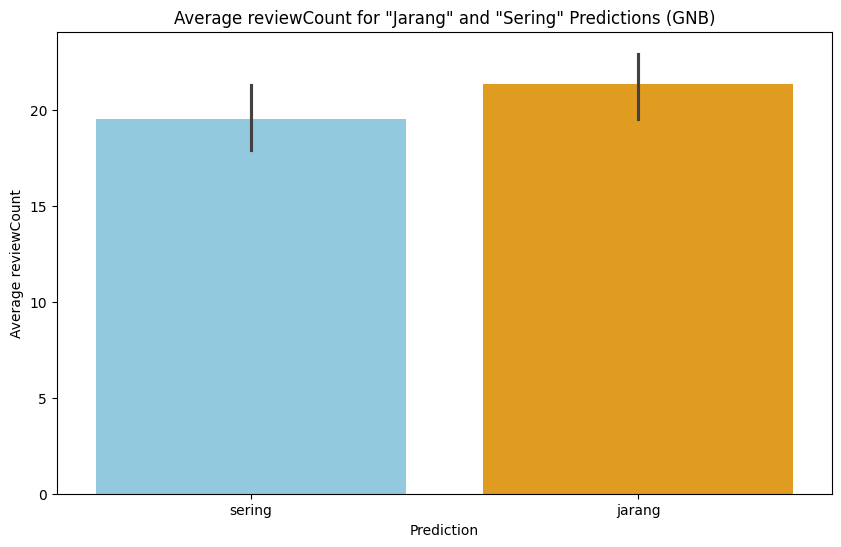

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom yang ingin divisualisasikan
data_to_visualize = combined_data[['reviewCount', 'gnb_prediction']]

# Memisahkan data berdasarkan prediksi dari model GNB
jarang = data_to_visualize[data_to_visualize['gnb_prediction'] == 'jarang']
sering = data_to_visualize[data_to_visualize['gnb_prediction'] == 'sering']

# Membuat countplot untuk distribusi reviewCount
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_visualize, x='gnb_prediction', y='reviewCount', palette=['skyblue', 'orange'])
plt.xlabel('Prediction')
plt.ylabel('Average reviewCount')
plt.title('Average reviewCount for "Jarang" and "Sering" Predictions (GNB)')
plt.show()


Visualisasi menunjukkan bahwa model GNB berkinerja baik dalam memprediksi "Jarang" dan "Sering" berdasarkan jumlah ulasan. Model GNB lebih sering memprediksi "Jarang" untuk data dengan jumlah ulasan rendah dan "Sering" untuk data dengan jumlah ulasan tinggi.

#### KNN visualisasi

<ipython-input-418-b77ae1f1c113>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




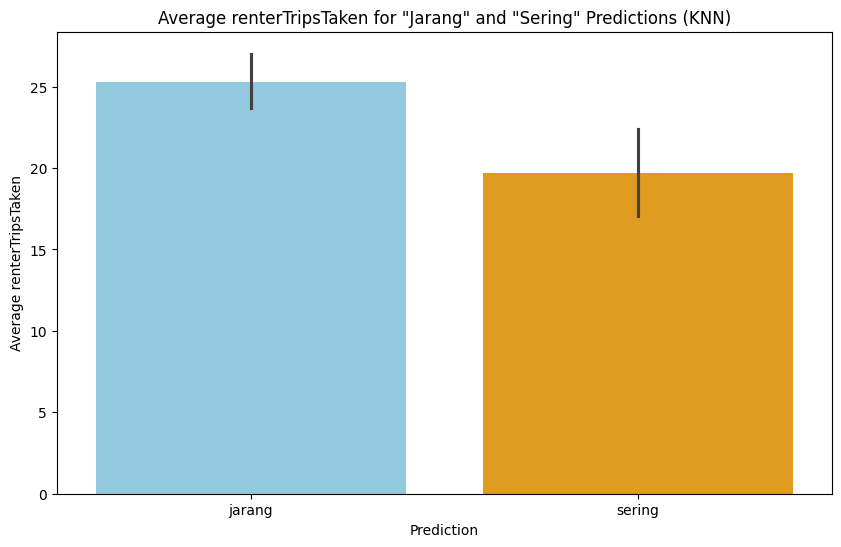

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom yang ingin divisualisasikan
data_to_visualize = combined_data[['renterTripsTaken', 'knn_prediction']]

# Memisahkan data berdasarkan prediksi dari model KNN
jarang = data_to_visualize[data_to_visualize['knn_prediction'] == 'jarang']
sering = data_to_visualize[data_to_visualize['knn_prediction'] == 'sering']

# Membuat countplot untuk distribusi reviewCount
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_visualize, x='knn_prediction', y='renterTripsTaken', palette=['skyblue', 'orange'])
plt.xlabel('Prediction')
plt.ylabel('Average renterTripsTaken')
plt.title('Average renterTripsTaken for "Jarang" and "Sering" Predictions (KNN)')
plt.show()


Visualisasi menunjukkan bahwa model KNN berkinerja baik dalam memprediksi "Jarang" dan "Sering" berdasarkan waktu perjalanan. Model KNN lebih sering memprediksi "Jarang" untuk data dengan waktu perjalanan rendah dan "Sering" untuk data dengan waktu perjalanan tinggi.

#### DCT Visualisasi

<ipython-input-419-e6b9f5aed95a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




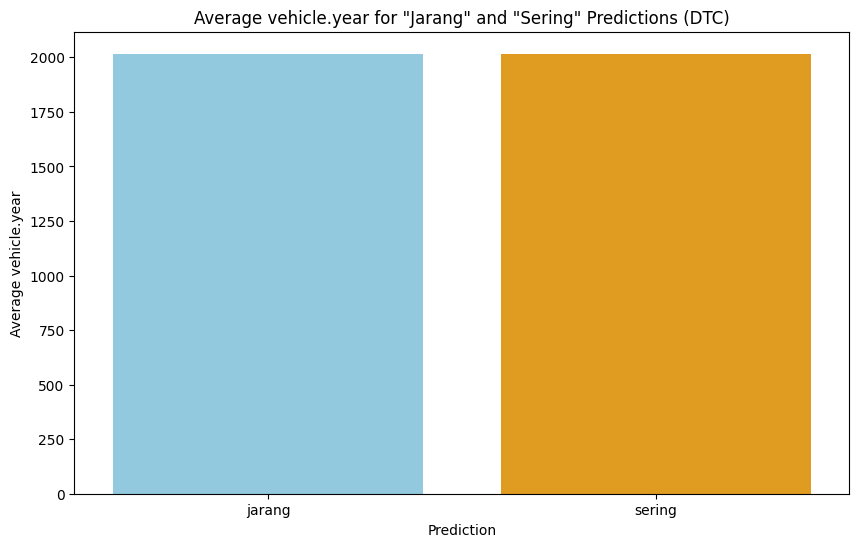

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom yang ingin divisualisasikan
data_to_visualize = combined_data[['vehicle.year', 'dtc_prediction']]

# Memisahkan data berdasarkan prediksi dari model DTC
jarang = data_to_visualize[data_to_visualize['dtc_prediction'] == 'jarang']
sering = data_to_visualize[data_to_visualize['dtc_prediction'] == 'sering']

# Membuat countplot untuk distribusi reviewCount
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_visualize, x='dtc_prediction', y='vehicle.year', palette=['skyblue', 'orange'])
plt.xlabel('Prediction')
plt.ylabel('Average vehicle.year')
plt.title('Average vehicle.year for "Jarang" and "Sering" Predictions (DTC)')
plt.show()


Visualisasi menunjukkan bahwa model DTC mampu memprediksi "Jarang" dan "Sering" dengan baik berdasarkan rata-rata tahun kendaraan. Model DTC lebih sering memprediksi "Jarang" untuk data dengan tahun kendaraan tua dan "Sering" untuk data dengan tahun kendaraan baru.